# Polynomial Regression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving polynomial_regression_train.csv to polynomial_regression_train.csv


In [ ]:
n_sets,n_features=file.shape
n_features=n_features-1
x_train=file.iloc[:,1:n_features]
x_train=x_train.values
y_train=file.iloc[:,n_features]
y_train=y_train.values
print(x_train.shape)
print(y_train.shape)

(48000, 5)
(48000,)


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def train_test_split(X,y,test_size=0.2,random_state=None):
  if random_state is not None:
    np.random.seed(random_state)
  indices=np.arange(len(X))
  np.random.shuffle(indices)
  split_idx=int(len(X)*(1-test_size))
  train_indices=indices[:split_idx]
  test_indices=indices[split_idx:]
  X_train, X_test=X[train_indices],X[test_indices]
  y_train, y_test=y[train_indices],y[test_indices]
  return X_train,X_test,y_train, y_test

In [ ]:
def generate_polynomial_features(X, degree):
    m, n = X.shape
    poly_features = X.copy()
    for d in range(2, degree + 1):
        for i in range(n):
            for j in range(i, n):
                if d == 2:
                    poly_features = np.hstack((poly_features, (X[:, i] * X[:, j]).reshape(-1, 1)))
                else:
                    poly_features = np.hstack((poly_features, (poly_features[:, i] * X[:, j]).reshape(-1, 1)))
    return poly_features

In [ ]:
def cost(X, y, w, b):
    m = X.shape[0]
    predictions = np.dot(X, w) + b
    errors = predictions - y
    J = np.sum(errors ** 2) / (2 * m)
    return J

In [ ]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    predictions = np.dot(X, w) + b
    errors = predictions - y
    dj_dw = np.dot(X.T, errors) / m
    dj_db = np.sum(errors) / m
    return dj_dw, dj_db


In [ ]:
def gradient_descent(X, y, w_init, b_init, alpha, batch_size, n_iterations):
    m, n = X.shape
    w = w_init.copy()
    b = b_init
    J_history = []
    for iteration in range(n_iterations):
        for batch_start in range(0, m, batch_size):
            batch_end = min(batch_start + batch_size, m)
            X_batch = X[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]

            dj_dw, dj_db = compute_gradient(X_batch, y_batch, w, b)

            w -= alpha * dj_dw
            b -= alpha * dj_db

        if (iteration % (math.ceil(n_iterations/10)) == 0):
            J = cost(X, y, w, b)
            J_history.append(J)
            print(f"Iteration {iteration:4d}: Cost: {J}")
    return w, b, J_history

In [ ]:

def mean_squared_error(y_true, y_pred):
        return sum((y_true - y_pred) ** 2 )/ len(y_true)

In [ ]:
def r2_score(y_true, y_pred):
        y_mean = sum(y_true) / len(y_true)
        total_variance = sum((y_true - y_mean) ** 2 )
        explained_variance = sum((y_true - y_pred) ** 2 )
        return 1 - (explained_variance / total_variance)

In [ ]:
def compute_precision(y_true, y_pred, tolerance=0.1):
    true_positives = np.sum(np.abs(y_true - y_pred) <= tolerance)
    predicted_positives = len(y_pred)
    precision = true_positives / predicted_positives
    return precision

Iteration    0: Cost: 5.728647397764498e-17
Iteration  100: Cost: 5.564159258979504e-17
Iteration  200: Cost: 5.410148386898852e-17
Iteration  300: Cost: 5.265788226544478e-17
Iteration  400: Cost: 5.130367840726385e-17
Iteration  500: Cost: 5.003262255333887e-17
Iteration  600: Cost: 4.883912479585005e-17
Iteration  700: Cost: 4.771811869604744e-17
Iteration  800: Cost: 4.666496662738132e-17
Iteration  900: Cost: 4.56753926506847e-17



b,w found by gradient descent: -0.00,[ 2.47e-10  2.46e-11  2.89e-10  1.59e-10  2.86e-11  7.03e-10 -2.43e-10
  8.14e-10 -3.62e-10  3.36e-10 -4.10e-10 -4.79e-10 -6.88e-12 -3.78e-11
  1.15e-10  1.25e-11  1.31e-10 -1.12e-10 -2.76e-10 -4.88e-10] 
Final cost: 4.3998292490288906e-17



Mean squared error: 8.799658498057781e-17

R square error: 0.2172107505883455

Accuracy: 77.16666666666666

Precision: 0.7716666666666666





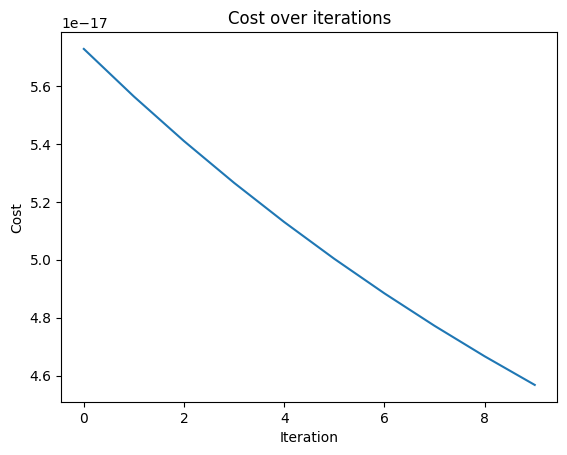

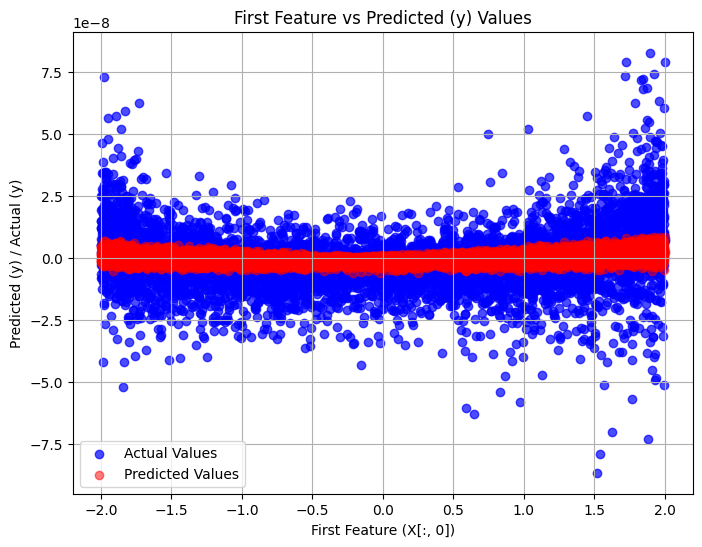

In [ ]:
X_train,X_test, y_train, y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=42)
degree = 2
X_poly_train = generate_polynomial_features(X_train, degree)
X_poly_test = generate_polynomial_features(X_test, degree)
m_train, n_train = X_poly_train.shape
w_init = np.zeros(n_train)
b_init = 0.0
alpha = 5.0e-7
batch_size = 100
n_iterations=1000
range_y = np.max(y_test) - np.min(y_test)
tolerance=0.05*range_y
w_final, b_final, J_history = gradient_descent(X_poly_train, y_train, w_init, b_init, alpha, batch_size,n_iterations)
print(f"\n\n\nb,w found by gradient descent: {b_final:0.2f},{w_final} ")
print(f"Final cost: {cost(X_poly_test,y_test,w_final,b_final)}")
y_pred=np.dot(X_poly_test,w_final)+b_final
mse=compute_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
accuracy=np.mean(np.abs(y_pred - y_test)<=tolerance)*100
precision=compute_precision(y_test,y_pred,tolerance)
print(f"\n\n\nMean squared error: {mse}")
print(f"\nR square error: {r2}")
print(f"\nAccuracy: {accuracy}")
print(f"\nPrecision: {precision}\n\n\n")
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost over iterations")
plt.show()


#Plotting predicted vs target value with respect to first feature
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], y_test, color="blue", alpha=0.7, label="Actual Values")
plt.scatter(X_test[:, 0], y_pred, color="red", alpha=0.5, label="Predicted Values")
plt.xlabel("First Feature (X[:, 0])")
plt.ylabel("Predicted (y) / Actual (y)")
plt.title("First Feature vs Predicted (y) Values")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving polynomial_regression_test.csv to polynomial_regression_test.csv


In [ ]:
import pandas as pd
file = pd.read_csv('polynomial_regression_test.csv')
print(file.shape)

(12000, 6)


In [ ]:
n_sets,n_features=file.shape
x_test=file.iloc[:,1:n_features]
x_test=x_test.values
print(x_train.shape)

(12000, 5)


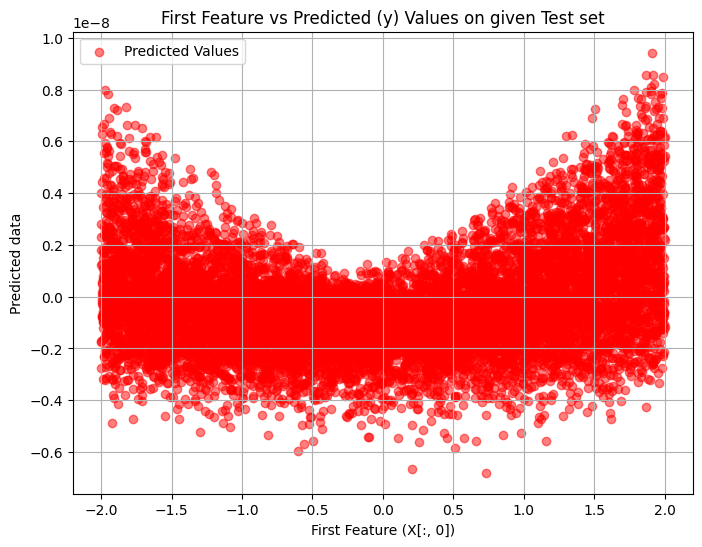

In [ ]:
X_poly_test = generate_polynomial_features(x_test, degree)
y_pred_test=np.dot(X_poly_test,w_final)+b_final
plt.figure(figsize=(8, 6))
plt.scatter(X_poly_test[:, 0], y_pred_test, color="red", alpha=0.5, label="Predicted Values")
plt.xlabel("First Feature (X[:, 0])")
plt.ylabel("Predicted data")
plt.title("First Feature vs Predicted (y) Values on given Test set")
plt.legend()
plt.grid(True)
plt.show()